In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

import pydot
from IPython.display import Image


%matplotlib inline


In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

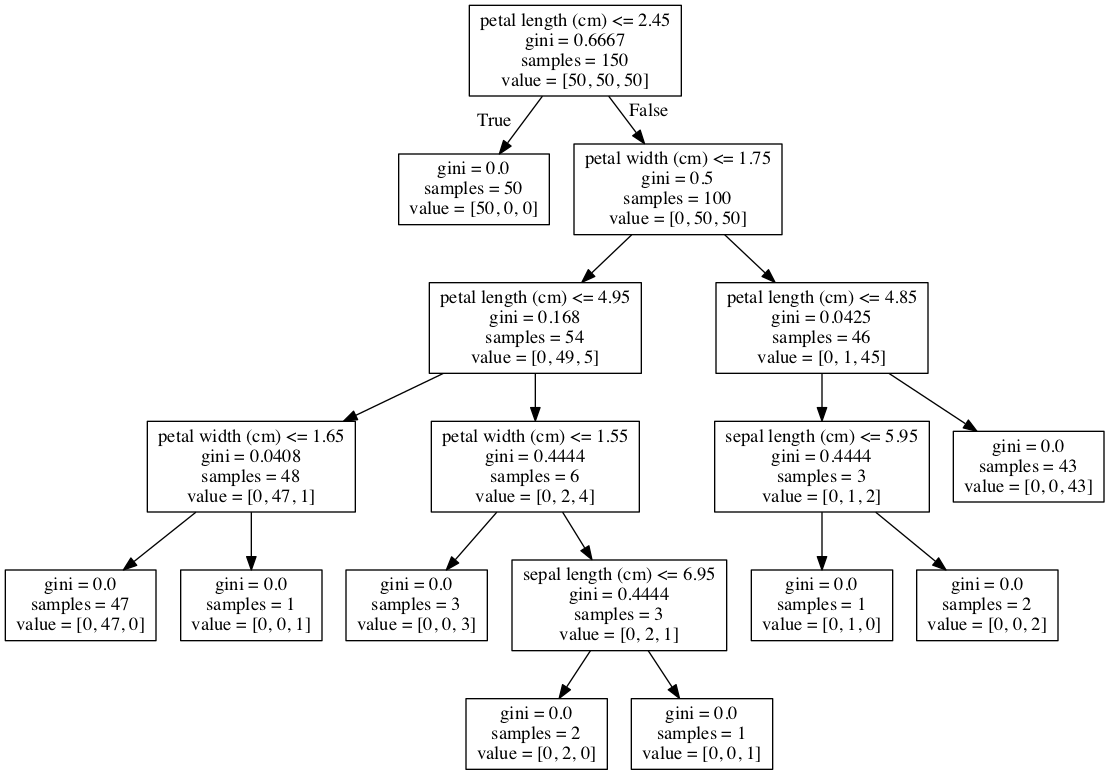

In [6]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


# Regression 


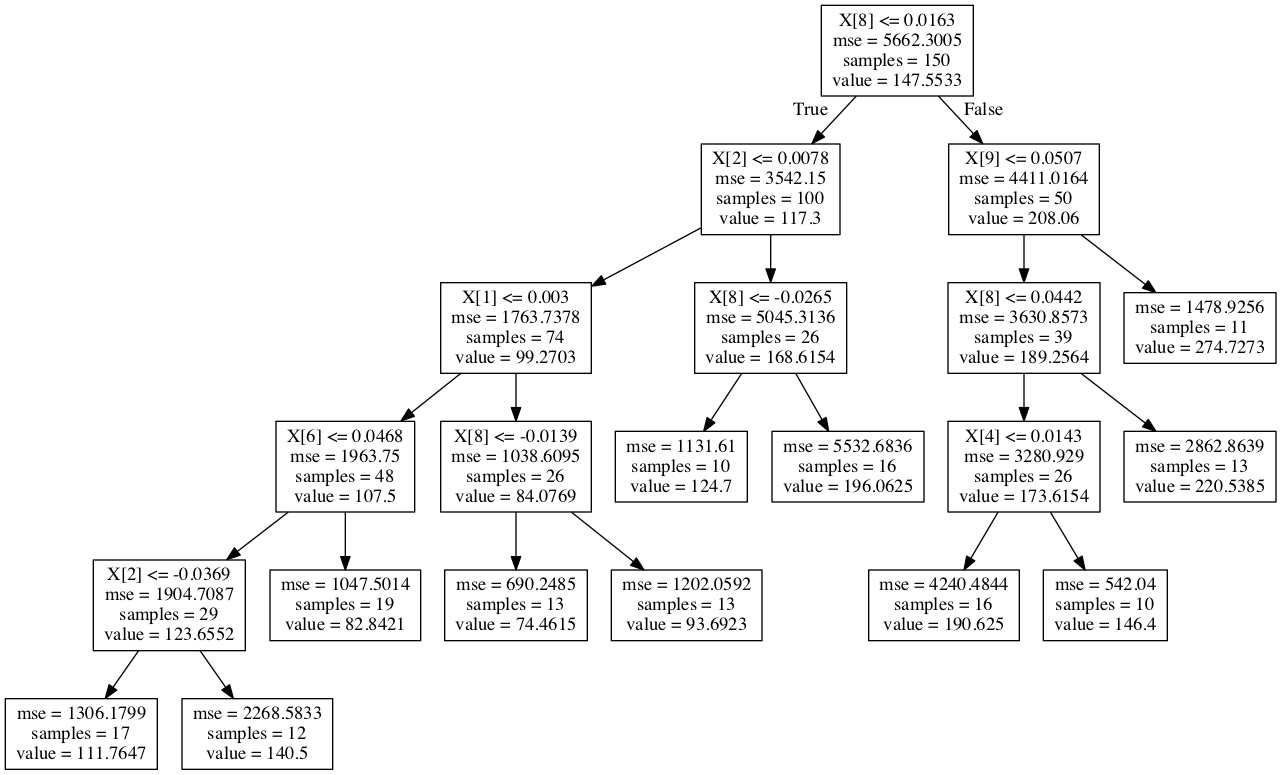

In [14]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

clf = tree.DecisionTreeRegressor(min_samples_leaf=10)
clf.fit(X,y)

gsrc = gridSearchCV()

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph[0].create_png())



In [12]:
df = pd.read_csv('../../datasets/ozone.csv')

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [36]:
np.random.seed(8)
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

clf = DecisionTreeRegressor(max_depth = 3, min_samples_split = 10)
# clf = DecisionTreeRegressor()
scores = cross_val_score(clf, X, y, cv=5)
print("scores: %0.2f"% np.mean(scores))
scores

scores: 0.31


array([ 0.22259211,  0.40957228,  0.33996568,  0.20381595,  0.36922476])

In [59]:
# Bagging
np.random.seed(8)
df = pd.read_csv('../../datasets/Hitters.csv', index_col = False)

df = df.dropna()
df['student']   = df.student.factorize()[0]
df['default']   = df.default.factorize()[0]


# How does the basic Decision tree work on the fraudulent dataset

X = df[['student', 'balance', 'income']]
y = df.default

clf = DecisionTreeRegressor()
scores = cross_val_score(clf, X, y, cv=5)
print("scores: %0.2f"% np.mean(scores))
scores


from sklearn.ensemble import BaggingClassifier

clf = DecisionTreeRegressor()
bagging = BaggingClassifier(n_estimators = 20, max_samples=0.5, bootstrap=True, oob_score = True)

scores = cross_val_score(bagging, X, y, cv=5)
print("scores: %0.2f"% np.mean(scores))
scores







scores: -0.38
scores: 0.97


array([ 0.97101449,  0.96951524,  0.968     ,  0.97148574,  0.96948474])

In [37]:
df = pd.read_csv('../../datasets/fraudulent.csv')
df.columns

Index([u'Unnamed: 0', u'default', u'student', u'balance', u'income'], dtype='object')

In [69]:
np.random.seed(8)
df = pd.read_csv('../../datasets/Hitters.csv', index_col = False)

df.shape
df.columns

Index([u'Unnamed: 0', u'AtBat', u'Hits', u'HmRun', u'Runs', u'RBI', u'Walks',
       u'Years', u'CAtBat', u'CHits', u'CHmRun', u'CRuns', u'CRBI', u'CWalks',
       u'League', u'Division', u'PutOuts', u'Assists', u'Errors', u'Salary',
       u'NewLeague'],
      dtype='object')

In [47]:
?BaggingClassifier